In [1]:
# Load libraries

import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pySuStaIn
import statsmodels.formula.api as smf
from scipy import stats
import sklearn.model_selection
from scipy.interpolate import interp1d
import os
import shutil
import math
from matplotlib.colors import LinearSegmentedColormap

/opt/homebrew/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Access pickle file
output_folder = os.path.join(os.getcwd(), 'WorkshopOutput')
dataset_name = 'WorkshopOutput'

# Get model output from pickle file
s = 0
pickle_filename_s = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle'
pk = pandas.read_pickle(pickle_filename_s)

# let's take a look at all of the things that exist in SuStaIn's output (pickle) file
pk.keys()

dict_keys(['samples_sequence', 'samples_f', 'samples_likelihood', 'ml_subtype', 'prob_ml_subtype', 'ml_stage', 'prob_ml_stage', 'prob_subtype', 'prob_stage', 'prob_subtype_stage', 'ml_sequence_EM', 'ml_sequence_prev_EM', 'ml_f_EM', 'ml_f_prev_EM'])

In [12]:
# Define which ml_stages to remove from analysis
stages_to_remove = [0]

In [13]:
# Load specific zdata you want to analyze (make sure the number of subtypes and input features are correct)
zdata = pandas.read_csv('zdata- with tmax.csv')

#Housekeeping
#zdata = zdata.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

# Delete subejcts with stages 0 and 1
zdata = zdata[~zdata['ml_stage'].isin(stages_to_remove)]
reduced_RIDs = zdata.RID.tolist()
zdata

,Unnamed: 0,RID,Diagnosis,AGE,ADAS11_bl,Average_hippo,Average_meta_tau,ctx_entorhinal_tau,ctx_inferiorparietal_tau,ctx_inferiortemporal_tau,...,Average_posteriorcingulate_vol,Average_precuneus_vol,Average_inferiorparietal_vol,Average_inferiortemporal_vol,Tmax,R,ml_subtype,prob_ml_subtype,ml_stage,prob_ml_stage
4,4,69,MCI,72.9,0.346530,0.370436,1.093217,0.857338,0.732524,0.930174,...,0.429549,-0.127077,0.361946,0.004851,1,0.188655,0.0,1.0,2.0,0.213479
6,6,112,Dementia,70.6,-0.381888,1.264939,2.516908,2.352541,1.569076,1.945189,...,-0.106565,0.578897,-0.171339,0.659188,0,0.169754,0.0,1.0,8.0,0.158778
7,7,120,CN,72.0,0.659156,1.115681,0.177170,0.233427,0.838920,0.111249,...,0.536819,0.014089,-0.840435,0.139758,0,0.224213,0.0,1.0,1.0,0.309789
8,8,127,MCI,70.6,-0.485055,2.687461,0.717396,0.204617,0.248290,1.050848,...,-0.067543,0.368051,-1.317886,0.672629,0,0.165982,0.0,1.0,1.0,0.262517
9,9,142,Dementia,79.2,0.033904,3.849849,0.580305,0.237012,-0.313023,0.103562,...,1.448306,1.020879,2.120448,1.871000,0,0.157609,0.0,1.0,3.0,0.334317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,643,6702,MCI,64.4,1.493868,0.288693,0.449127,0.262114,0.001442,0.472942,...,0.310726,0.025831,0.035025,1.091175,0,0.209767,0.0,1.0,1.0,0.298037
645,645,6704,MCI,65.3,3.160164,0.470892,-0.188450,-0.323373,0.191931,-0.064490,...,0.455020,0.965912,1.024877,1.925646,0,0.158287,0.0,1.0,1.0,0.331128
646,646,6705,MCI,74.9,0.971782,2.098817,1.965910,2.678315,1.139518,1.376567,...,0.922593,-0.098058,0.080927,-0.253239,0,0.186192,0.0,1.0,8.0,0.182323
648,648,6721,Dementia,77.9,3.785416,2.874163,-0.762779,-0.695716,-1.116853,-0.748597,...,-0.350836,0.463439,-0.699300,-0.347036,0,0.144258,0.0,1.0,2.0,0.386964


(0.0, 65.0)

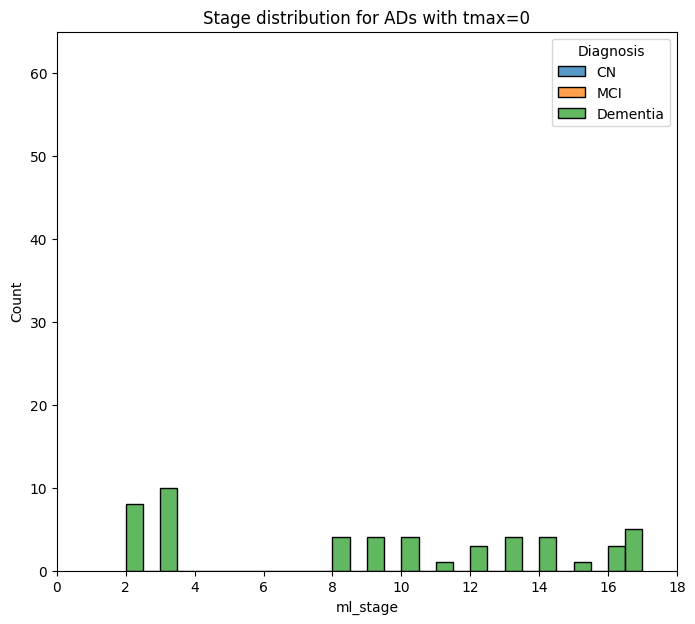

In [139]:
# TEMP
filtered_tmax0_withstage = zdata[zdata['RID'].isin(odd_rids_tmax)]

plt.figure(figsize=(8, 7))
ax = sns.histplot(data=filtered_tmax0_withstage, bins = 30, x='ml_stage', color = 'red', hue='Diagnosis', multiple='stack')
plt.title('Stage distribution for ADs with tmax=0')
#plt.legend(title='Diagnosis')
plt.xlim(0,18)
plt.ylim(0, 65)

In [146]:
beta0_tmax = filtered_beta0_withstage['Tmax'].tolist()
def find_mean(numbers):
    if not numbers:
        return 0  # Handle case when the list is empty
    return np.mean(numbers)

mean = find_mean(beta0_tmax)
print(f"The mean is: {mean}")

The mean is: 0.8958333333333334


(0.0, 65.0)

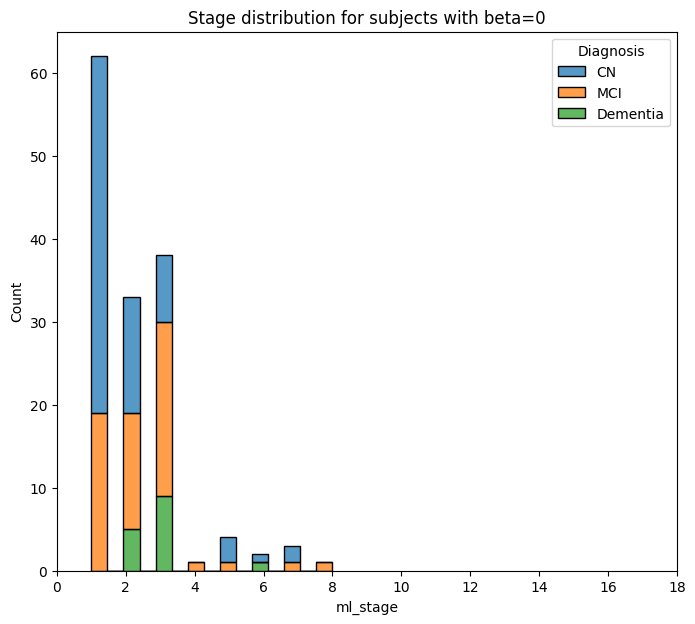

In [140]:
# TEMP
filtered_beta0_withstage = zdata[zdata['RID'].isin(odd_rids_beta)]
plt.figure(figsize=(8, 7))
ax = sns.histplot(data=filtered_beta0_withstage, bins = 15, x='ml_stage', color = 'red', hue='Diagnosis', multiple='stack')
plt.title('Stage distribution for subjects with beta=0')
#plt.legend(title='Diagnosis')
plt.xlim(0,18)
plt.ylim(0, 65)

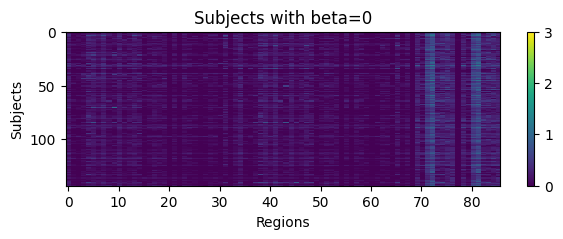

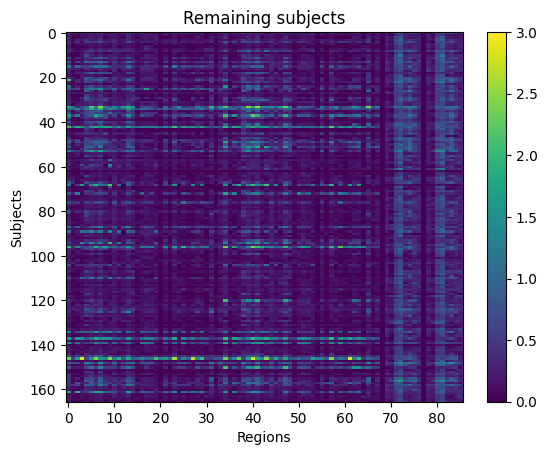

In [125]:
# TEMP
filtered_beta0 = tau_data[tau_data['RID'].isin(odd_rids_beta)]

filtered_nonbeta0 = tau_data[~tau_data['RID'].isin(odd_rids_beta)]

plt.figure(figsize=(7, 2))
plt.imshow(filtered_beta0.iloc[:, 1:], cmap='viridis', interpolation='none', aspect='auto',vmin=-0, vmax=3)
plt.colorbar()  # Add a color bar to map colors to values
plt.title('Subjects with beta=0')
plt.xlabel('Regions')  # Replace with your actual label
plt.ylabel('Subjects')
plt.show()

plt.imshow(filtered_nonbeta0.iloc[:, 1:], cmap='viridis', interpolation='none', aspect='auto',vmin=-0, vmax=3)
plt.colorbar()  # Add a color bar to map colors to values
plt.title('Remaining subjects')
plt.xlabel('Regions')  # Replace with your actual label
plt.ylabel('Subjects')
plt.show()

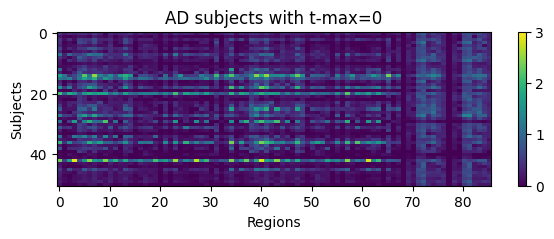

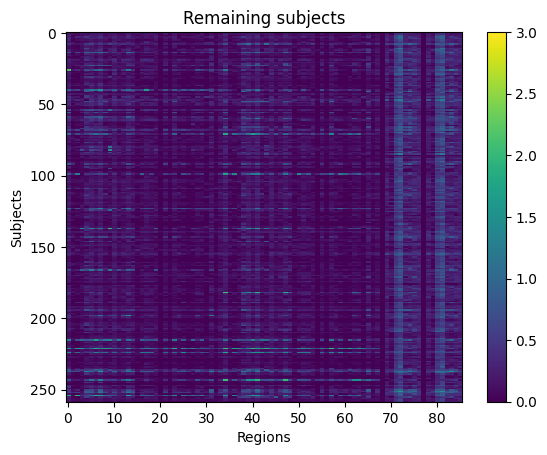

In [126]:
# TEMP
filtered_tmax0 = tau_data[tau_data['RID'].isin(odd_rids_tmax)]

filtered_nontmax0 = tau_data[~tau_data['RID'].isin(odd_rids_tmax)]

plt.figure(figsize=(7, 2))
plt.imshow(filtered_tmax0.iloc[:, 1:], cmap='viridis', interpolation='none', aspect='auto',vmin=-0, vmax=3)
plt.colorbar()  # Add a color bar to map colors to values
plt.title('AD subjects with t-max=0')
plt.xlabel('Regions')  # Replace with your actual label
plt.ylabel('Subjects')
plt.show()

plt.imshow(filtered_nontmax0.iloc[:, 1:], cmap='viridis', interpolation='none', aspect='auto',vmin=-0, vmax=3)
plt.colorbar()  # Add a color bar to map colors to values
plt.title('Remaining subjects')
plt.xlabel('Regions')  # Replace with your actual label
plt.ylabel('Subjects')
plt.show()

In [147]:
# TEMP
filtered = zdata[zdata['Tmax'] == 0]
#filtered2 = filtered[filtered['Diagnosis'].isin(['Dementia'])]
odd_rids_tmax = filtered['RID'].tolist()
odd_rids_beta = [  69,  142,  377,  626,  896,  969, 1169, 2068, 2121, 2130, 2155,
       2304, 2333, 2374, 2395, 4037, 4060, 4071, 4094, 4114, 4119, 4149,
       4176, 4177, 4179, 4197, 4199, 4254, 4272, 4290, 4292, 4301, 4387,
       4428, 4430, 4453, 4536, 4548, 4654, 4659, 4721, 4744, 4809, 4862,
       4869, 4876, 4896, 4919, 5097, 5124, 5176, 5273, 6019, 6030, 6043,
       6049, 6056, 6068, 6075, 6084, 6120, 6143, 6148, 6159, 6173, 6179,
       6183, 6185, 6186, 6197, 6206, 6211, 6213, 6224, 6227, 6229, 6236,
       6240, 6251, 6255, 6257, 6258, 6260, 6274, 6281, 6282, 6283, 6291,
       6298, 6307, 6314, 6315, 6317, 6321, 6327, 6346, 6350, 6354, 6369,
       6370, 6389, 6402, 6415, 6417, 6423, 6426, 6427, 6441, 6442, 6446,
       6455, 6463, 6465, 6468, 6471, 6473, 6474, 6476, 6488, 6504, 6510,
       6535, 6542, 6543, 6547, 6559, 6573, 6575, 6577, 6581, 6586, 6589,
       6593, 6612, 6621, 6622, 6629, 6643, 6651, 6652, 6687, 6688, 6705,
       6721]

beta_set = set(odd_rids_beta)
tmax_set = set(odd_rids_tmax)

# Find common elements (intersection)
common_elements = beta_set.intersection(tmax_set)

# Count of common elements
num_matches = len(common_elements)

print(f"Number of matching items: {num_matches}")

Number of matching items: 88


In [14]:
# SPECIFY THE NUMBER OF SUBTYPES
nsubtypes = 1

In [15]:
if nsubtypes > 1:
    print(zdata.ml_subtype.value_counts())
    
print(zdata.ml_stage.value_counts())
print(zdata.Diagnosis.value_counts())

ml_stage
1.0     94
3.0     46
2.0     42
6.0     17
8.0     17
10.0    14
7.0     12
13.0    11
14.0    11
9.0     10
17.0     8
5.0      8
12.0     7
16.0     6
4.0      3
18.0     2
15.0     1
11.0     1
Name: count, dtype: int64
Diagnosis
CN          129
MCI         121
Dementia     60
Name: count, dtype: int64


## Generate Stage Histogram

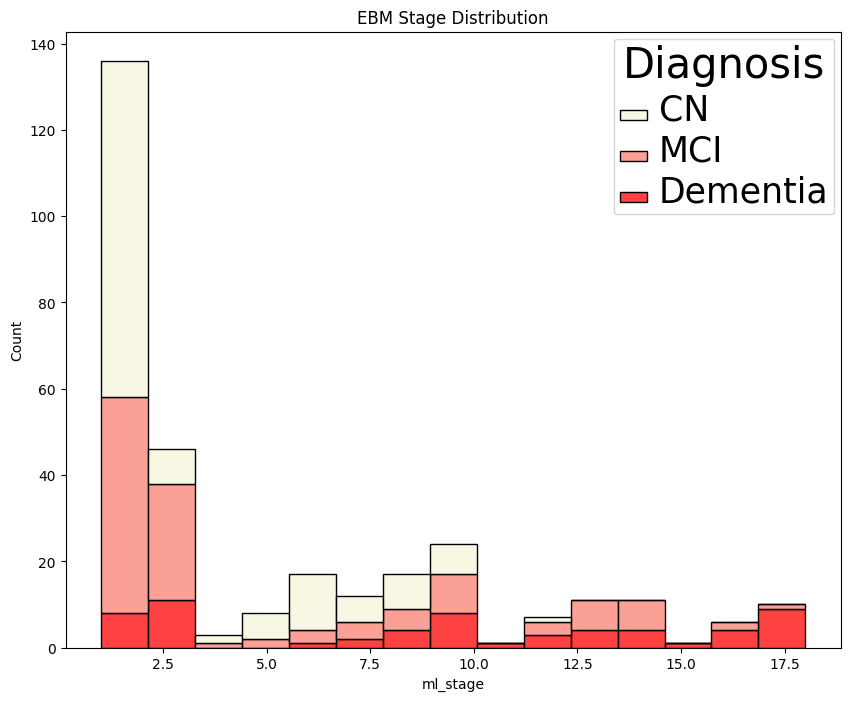

In [44]:
# Use clincial diagnostic categories as a rough way to assess the success of the model's stage assignments
color_palette = {
    'Dementia': '#FE0101',  # Deep red
    'MCI': '#FA8072',  # Salmon
    'CN': '#F5F5DC'}   # Beige (light beige)
    
if nsubtypes < 2: # If only one subtype
    plt.figure(figsize=(10, 8))
    ax = sns.histplot(data=zdata, x='ml_stage', color = 'red', bins = 15, palette=color_palette, hue='Diagnosis', multiple='stack',legend=True)

    # Adjust the legend
    legend = ax.get_legend()
    legend.set_title('Diagnosis')
    plt.setp(legend.get_title(), fontsize='30')  # for legend title
    plt.setp(legend.get_texts(), fontsize='25')  # for legend text

    # Remove axis labels
    #ax.set(xlabel=None, ylabel=None)
    ax.set_title('EBM Stage Distribution')
    #ax.set_xticklabels([])  # Hide x-axis tick labels but keep the tick marks
    #ax.set_yticklabels([])  # Hide y-axis tick labels but keep the tick marks
    plt.show()
else:  # If multiple subtypes
    sns.displot(data=zdata, x='ml_stage', hue='Diagnosis', col='ml_subtype', kind='hist', multiple='stack')
    plt.show()

# Trajectory plots for each biomarker

In [17]:
# store our biomarker labels as a variable
biomarkers = zdata.columns[[4,5,7,11,12,21]]
print(biomarkers)

Index(['ADAS11_bl', 'Average_hippo', 'ctx_entorhinal_tau', 'Hippocampus_tau',
       'Amygdala_tau', 'Tmax'],
      dtype='object')


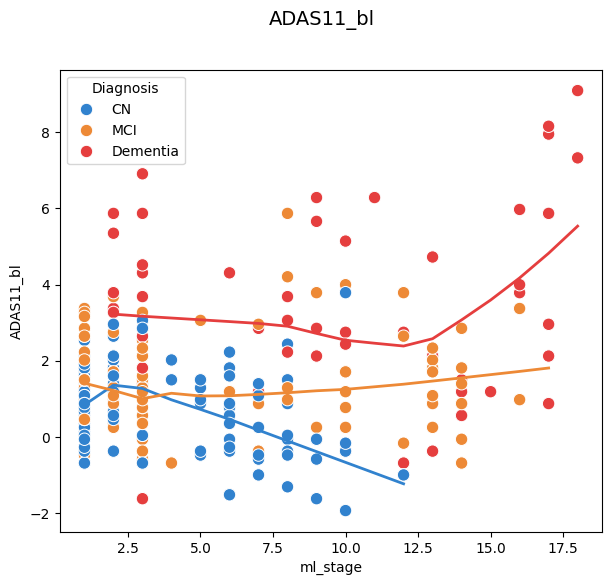

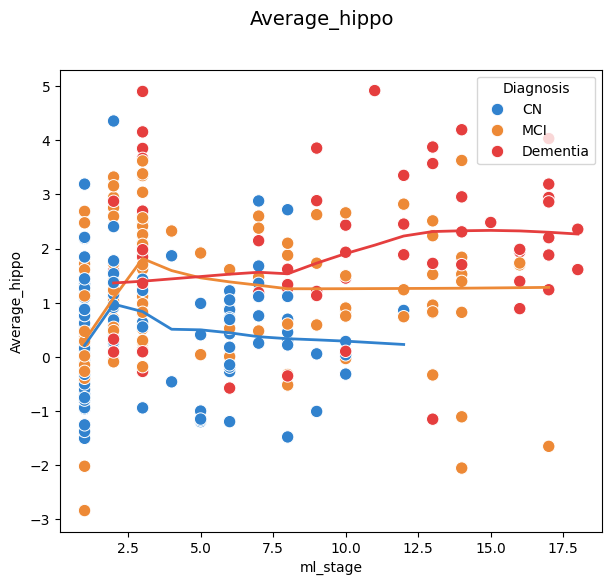

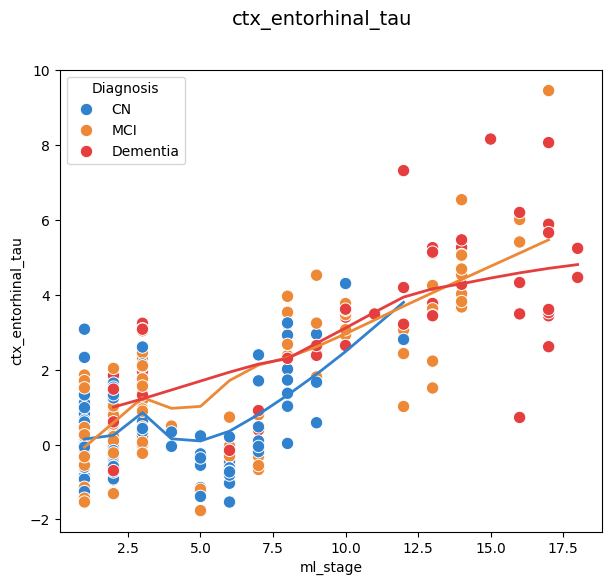

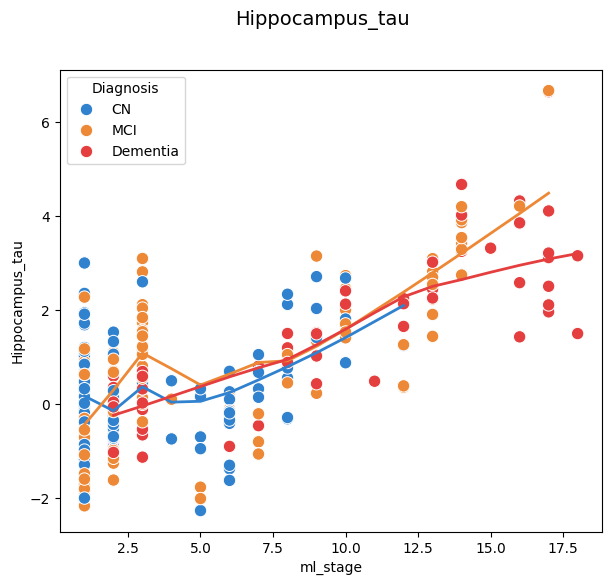

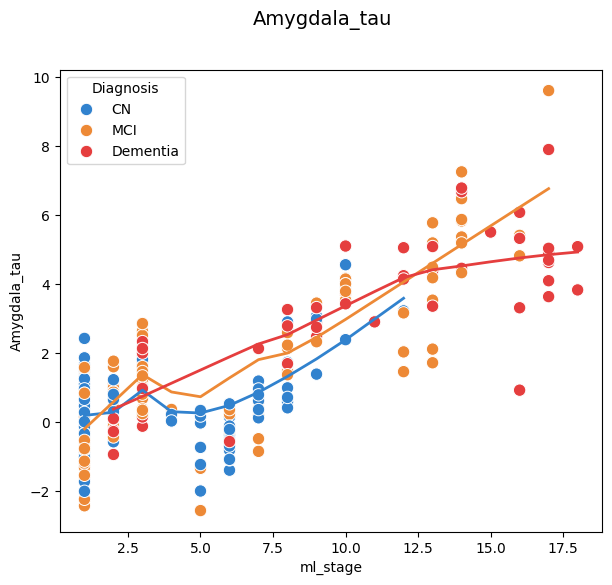

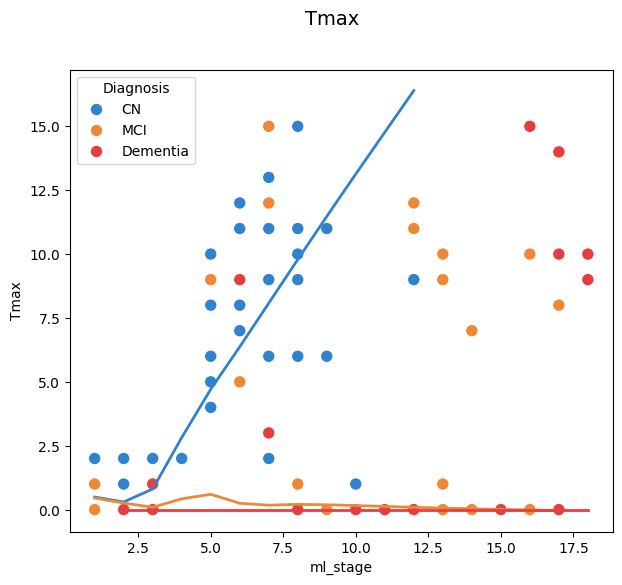

In [43]:
# Ensure that diagnosis column is treated as a categorical variable with a specified order
diagnosis_order = pandas.CategoricalDtype(['CN', 'MCI', 'Dementia'], ordered=True)
zdata['Diagnosis'] = zdata['Diagnosis'].astype(diagnosis_order)

# Create a custom color palette
custom_palette = {
    'CN': '#3182CE',     # Standard blue
    'MCI': '#ED8936',    # Standard orange
    'Dementia': '#E53E3E' # Standard red
}

# Your plotting code
y_min = zdata[biomarkers].min().min()  # Global minimum across all biomarkers
y_max = zdata[biomarkers].max().max()  # Global maximum across all biomarkers

if nsubtypes < 2:  # If only one subtype
    
    for biomarker in biomarkers:
        plt.figure(figsize=(7, 6))  # Adjust figure size if needed
    
        # Plot scatter points
        sns.scatterplot(x='ml_stage', y=biomarker, data=zdata, 
                        hue='Diagnosis', palette=custom_palette,
                        s=80)  # Adjust scatter point size if needed

        # Add regression lines for each diagnosis
        for diagnosis in ['CN', 'MCI', 'Dementia']:
            sns.regplot(x='ml_stage', y=biomarker, 
                        data=zdata[zdata['Diagnosis'] == diagnosis], 
                        scatter=False, 
                        color=custom_palette[diagnosis], 
                        lowess=True,
                        line_kws={'lw': 2, 'alpha': 1.0})  # Thinner line (lw: line width)

        
        # Get current axis (gca) object
        #ax = plt.gca()

        # Remove x and y axis labels
        #ax.set_xticklabels([])  # Hide x-axis tick labels but keep the tick marks
        #ax.set_yticklabels([])  # Hide y-axis tick labels but keep the tick marks
        #ax.set_xlabel('')  # Removing x-axis label if there is one
        #ax.set_ylabel('')  # Removing y-axis label if there is one

        # Add a title to the plot
        plt.gcf().suptitle(biomarker, fontsize=14) 

        # Set the same y-axis range for all plots
        #plt.ylim(y_min, y_max)

        plt.show()
    
else: # If multiple subtypes

    for biomarker in biomarkers:
        # Plot relationship between each biomarker and stage for all subtypes together
        sns.lmplot(x='ml_stage', y=biomarker, hue='ml_subtype', data=zdata, lowess=True, aspect=1.5)

        # Add a title to the plot
        plt.title(f'{biomarker} Across Subtypes', fontsize=14)

        # Set the same y-axis range for all plots
        plt.ylim(y_min, y_max)

        plt.show()

# Calculate y_k at each stage for a biomarker
Can use this code for any biomarker, including tau regional values and functional metrics. 

In [19]:
# Load data for biomarker of interest (in this case tau densities)
tau_data = pandas.read_csv('Cog_Tau_V1.csv')

#Housekeeping
tau_data = tau_data.drop(['Unnamed: 0'], axis=1)
tau_data = tau_data.rename(columns ={'merge_RID' : 'RID'})

# Delete RIDs with NaN values in any column (only run for 'Cog_Tau_V1.csv') and redundant RIDS if cross-sectional 
#indices_to_drop = [97,105, 238, 250, 388, 400, 439, 454, 734, 778]
#tau_data = tau_data.drop(indices_to_drop, axis=0)
tau_data = tau_data.drop_duplicates(subset='RID', keep='first')

# Delete subjects with stages to exclude
tau_data = tau_data[tau_data['RID'].isin(reduced_RIDs)]

# Find the average of the right and left cerebellum 
tau_data['Average_Cerebellum'] = (tau_data['Left-Cerebellum-Cortex']+ tau_data['Right-Cerebellum-Cortex'])/2

# Divide each regional tau value by the average of R and L cerebellum tau and subtract 1
tau_data.iloc[:, 6:] = tau_data.iloc[:, 6:].div(tau_data['Average_Cerebellum'], axis=0) - 1

tau_data = tau_data.drop(columns=['Average_Cerebellum', 'MMSE_bl', 'ADAS11_bl', 'ADAS13_bl', 'merge_DX', 'best_DX'])

# Reset index for tau
tau_data.reset_index(drop=True, inplace=True)

# Gaussian Interpolation 
Create and plot a continuous time series from discrete y_k values for biomarker of interest

Text(0.5, 1.0, 'Regional Tau Gaussian Interpolations')

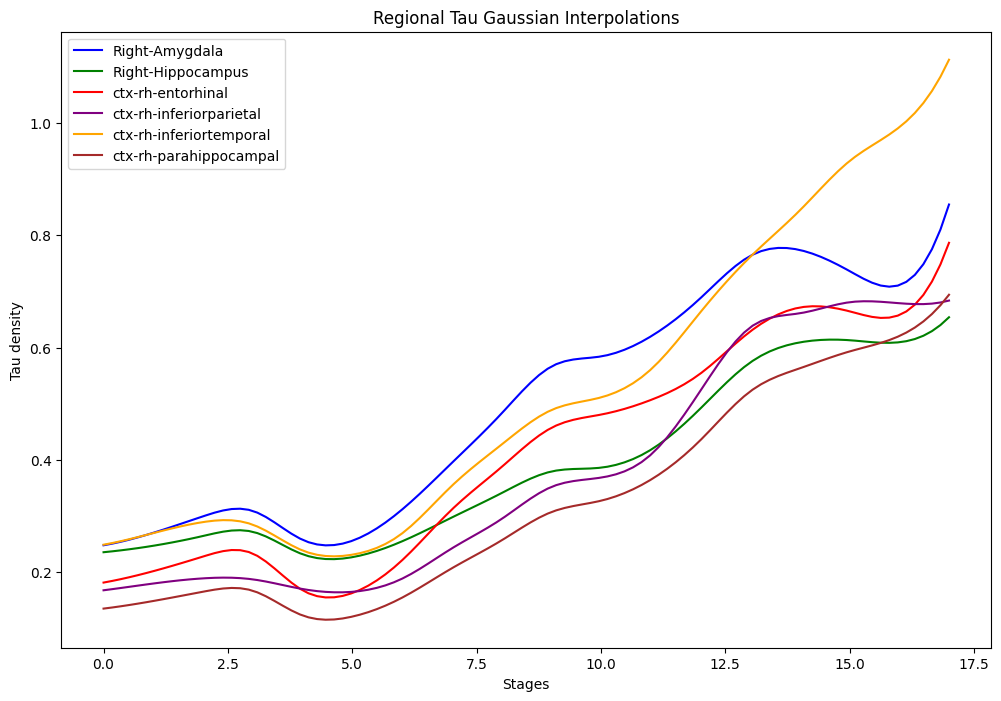

In [39]:
# Create a data frame for the stage probability distributions for each subject from pickle file
prob_stage = pandas.DataFrame(pk['prob_stage'])
ml_stage = pandas.DataFrame(pk['ml_stage'])
prob_stage = pandas.concat([ml_stage, prob_stage,], axis=1)

# Delete subjects in stages to exclude
prob_stage = prob_stage[~prob_stage.iloc[:, 0].isin(stages_to_remove)]
prob_stage.drop(prob_stage.columns[0], axis=1, inplace=True)

# Define the number of stages 
stage_count = prob_stage.shape[1]

# Define biomarkers of interest
biomarkers_of_interest = [
    'Right-Amygdala', 'Right-Hippocampus', 'ctx-rh-entorhinal', 'ctx-rh-inferiorparietal', 'ctx-rh-inferiortemporal', 'ctx-rh-parahippocampal'
]

# Set up the plot
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']  # Define different colors for each biomarker

for biomarker, color in zip(biomarkers_of_interest, colors): 
    # Define biomarker data as an array dimensions 1 x i where i is the number of subjects
    biomarker_data = tau_data[biomarker]

    # Initialize lists of y(k) values and variance for each stage k
    biomarker_values = []
    variance_values = []

    for k in range(int(stage_count)):  # For each stage k
        total = 0  # Define a variable for the sum of all subjects i (numerator)

        for i in range(len(biomarker_data)):  # For each subject i 
            prob = prob_stage.iloc[i, k]  # Define the probability that subject i is in stage k 
            value = biomarker_data.iloc[i]  # Define the value of the biomarker for subject i 
            product = prob * value  # Multiply 
            total = total + product  # Add the product of the biomarker value and stage probability to the sum of i for stage k

        column_sum = np.sum(prob_stage.iloc[:, k])  # (denominator) 
        mean = total / column_sum  # Normalize with the sum of probabilities for each subject in stage k
        biomarker_values.append(mean)  # Save mean to biomarker_values list

        variance = 0  # Define variance for stage k
        
        for i in range(len(biomarker_data)):  # For each subject i 
            prob = prob_stage.iloc[i, k] 
            value = biomarker_data.iloc[i] 
            variance_individual = prob * (value - mean) ** 2
            variance = variance + variance_individual 

        variance = variance / len(biomarker_data)  # Normalize
        variance = math.sqrt(variance)  # Take the square root
        
        variance_values.append(variance)  # Save variance to list for stage k

    x = np.linspace(0, stage_count - 1, stage_count) 
    y = biomarker_values 
    variance = variance_values

    # Perform interpolation 
    f = interp1d(x, y, kind='cubic')

    # New x values for which we want to interpolate
    xnew = np.linspace(0, stage_count - 1, 100) 

    # Interpolate y values for the new x values
    ynew = f(xnew)

    # Create a shaded area for the error
    #upper = y + np.sqrt(variance)
    #lower = y - np.sqrt(variance)

    # Plotting
    #plt.fill_between(x, lower, upper, color=color, alpha=0.2)
    plt.plot(xnew, ynew, '-', color=color, label=biomarker)

# Add legend, labels, and title
plt.legend()
plt.xlabel('Stages')
plt.ylabel('Tau density')
plt.title('Regional Tau Gaussian Interpolations')
#plt.ylim(bottom=0, top=5)

# Display the plot


In [49]:
# Alternate probability heatmap for cognitive score order with overlay 

# Add diagnosis, cognitive score, and ml_stage to data frame
prob_stage_plot = pandas.merge(zdata,prob_stage,left_index=True, right_index=True)
prob_stage_plot = prob_stage_plot.iloc[:,[1, 3, 22] + list(range(24, prob_stage_plot.shape[1]))]

# Define your custom colormap
colors = [
    "#f4cca1",  # beige
    "#ff8c69",  # light salmon (intermediate color for smoother transition)
    "#ff5533",  # tomato red (stronger red)
    "#ff2200",  # orange red (more intense)
    "#760909"   # red (most intense)
]
custom_red_colormap = LinearSegmentedColormap.from_list("custom_red", colors)

# By cognitive score
by_cog = prob_stage_plot.sort_values(by='ADAS11_bl')
# Normalize ADAS11_bl scores to the range of indices used in the x-axis of the heatmap
normalized_ADAS11 = (by_cog['ADAS11_bl'] - by_cog['ADAS11_bl'].min()) / (by_cog['ADAS11_bl'].max() - by_cog['ADAS11_bl'].min())
scaled_ADAS11_x = normalized_ADAS11 * (by_cog.shape[1] - 3.5)  # Scale to width of heatmap
by_cog = by_cog.iloc[:,3:]
plt.figure(figsize=(8,10))
plt.imshow(by_cog, cmap=custom_red_colormap, interpolation='none', aspect='auto')
# Generate y-values for the line plot (assuming a simple sequential order, you may adjust as needed)
y_values = np.arange(by_cog.shape[0])
# Overlay the line representing the ADAS11 score for each subject
plt.plot(scaled_ADAS11_x, y_values, color='black', marker='o', linestyle='-', linewidth=2, markersize=1, label='ADAS11 Score Line')
ax = plt.gca()  # Get the current axes
ax.set_xticklabels([])  # Remove x-axis tick labels but keep the tick marks
ax.set_yticklabels([])  # Remove y-axis tick labels but keep the tick marks

# Create a secondary x-axis
ax2 = plt.twiny()
# Define new x-ticks for the secondary x-axis. Ensure they align with primary axis
new_tick_positions = [-2, 1, 4, 7, 10, 13]  # Specify positions where you want ticks

# Set the ticks and labels for the secondary x-axis
ax2.set_xlim(ax1.get_xlim())  # Ensure alignment with primary x-axis
ax2.set_xticks(new_tick_positions)  # Set the ticks at desired positions

# Provide labels for these tick positions
#ax2.set_xticklabels(['-2', '0', '2', '4', '6', '8'])  # Corresponding labels for each tick
ax2.set_xticklabels([])

# Add a label to the secondary x-axis
#ax2.set_xlabel('ADAS11')

# Customize the plot
#plt.xlabel('Stage')
plt.ylabel('Subjects')
#plt.title('Heatmap with ADAS11 Score Overlay')
#plt.legend()
plt.show()

KeyError: 'ADAS11_bl'

In [50]:
# Plot probability stage matrix

# Add diagnosis, cognitive score, and ml_stage to data frame
prob_stage_plot = pandas.merge(zdata,prob_stage,left_index=True, right_index=True)
prob_stage_plot = prob_stage_plot.iloc[:,[1, 3, 22] + list(range(24, prob_stage_plot.shape[1]))]

# Define your custom colormap
colors = [
    "#f4cca1",  # beige
    "#ff8c69",  # light salmon (intermediate color for smoother transition)
    "#ff5533",  # tomato red (stronger red)
    "#ff2200",  # orange red (more intense)
    "#760909"   # red (most intense)
]
custom_red_colormap = LinearSegmentedColormap.from_list("custom_red", colors)

# Plotting by diagnosis
CN = prob_stage_plot[prob_stage_plot['Diagnosis'] == 'CN']
MCI = prob_stage_plot[prob_stage_plot['Diagnosis'] == 'MCI']
AD = prob_stage_plot[prob_stage_plot['Diagnosis'] == 'Dementia']
CN_by_stage = CN.sort_values(by='ml_stage')
MCI_by_stage = MCI.sort_values(by='ml_stage')
AD_by_stage = AD.sort_values(by='ml_stage')
by_diagnosis = pandas.concat([CN_by_stage, MCI_by_stage, AD_by_stage], ignore_index=True)
by_diagnosis = by_diagnosis.iloc[:,3:]
plt.figure(figsize=(8, 10))
plt.imshow(by_diagnosis, cmap=custom_red_colormap, interpolation='none', aspect='auto')
ax = plt.gca()  # Get the current axes
ax.set_xticklabels([])  # Remove x-axis tick labels but keep the tick marks
ax.set_yticklabels([])  # Remove y-axis tick labels but keep the tick marks
plt.show()

# By cognitive score
by_cog = prob_stage_plot.sort_values(by='ADAS11_bl')
by_cog = by_cog.iloc[:,3:]
plt.figure(figsize=(8, 10))
plt.imshow(by_cog, cmap=custom_red_colormap, interpolation='none', aspect='auto')
ax = plt.gca()  # Get the current axes
ax.set_xticklabels([])  # Remove x-axis tick labels but keep the tick marks
ax.set_yticklabels([])  # Remove y-axis tick labels but keep the tick marks


# By most likely stage 
by_stage = prob_stage_plot.sort_values(by='ml_stage')
by_stage = by_stage.iloc[:,3:]
plt.figure(figsize=(8, 10))
plt.imshow(by_stage, cmap=custom_red_colormap, interpolation='none', aspect='auto')
ax = plt.gca()  # Get the current axes
ax.set_xticklabels([])  # Remove x-axis tick labels but keep the tick marks
ax.set_yticklabels([])  # Remove y-axis tick labels but keep the tick marks



plt.show()

KeyError: 'Diagnosis'

# Calculate a continous time series for a biomarker in every brain region
Perform the above operations for every brain region (currently looking at tau)

In [24]:
# Now let's calculate an interpolation for tau in every region 

column_labels = ['ctx-rh-bankssts', 'ctx-rh-caudalanteriorcingulate','ctx-rh-caudalmiddlefrontal','ctx-rh-cuneus','ctx-rh-entorhinal','ctx-rh-fusiform','ctx-rh-inferiorparietal','ctx-rh-inferiortemporal','ctx-rh-isthmuscingulate','ctx-rh-lateraloccipital','ctx-rh-lateralorbitofrontal','ctx-rh-lingual','ctx-rh-medialorbitofrontal','ctx-rh-middletemporal','ctx-rh-parahippocampal','ctx-rh-paracentral','ctx-rh-parsopercularis','ctx-rh-parsorbitalis','ctx-rh-parstriangularis','ctx-rh-pericalcarine','ctx-rh-postcentral','ctx-rh-posteriorcingulate','ctx-rh-precentral','ctx-rh-precuneus','ctx-rh-rostralanteriorcingulate','ctx-rh-rostralmiddlefrontal','ctx-rh-superiorfrontal','ctx-rh-superiorparietal','ctx-rh-superiortemporal','ctx-rh-supramarginal','ctx-rh-frontalpole','ctx-rh-temporalpole','ctx-rh-transversetemporal','ctx-rh-insula','ctx-lh-bankssts','ctx-lh-caudalanteriorcingulate','ctx-lh-caudalmiddlefrontal','ctx-lh-cuneus','ctx-lh-entorhinal','ctx-lh-fusiform','ctx-lh-inferiorparietal','ctx-lh-inferiortemporal','ctx-lh-isthmuscingulate','ctx-lh-lateraloccipital','ctx-lh-lateralorbitofrontal','ctx-lh-lingual','ctx-lh-medialorbitofrontal','ctx-lh-middletemporal','ctx-lh-parahippocampal','ctx-lh-paracentral','ctx-lh-parsopercularis','ctx-lh-parsorbitalis','ctx-lh-parstriangularis','ctx-lh-pericalcarine','ctx-lh-postcentral','ctx-lh-posteriorcingulate','ctx-lh-precentral','ctx-lh-precuneus','ctx-lh-rostralanteriorcingulate','ctx-lh-rostralmiddlefrontal','ctx-lh-superiorfrontal','ctx-lh-superiorparietal','ctx-lh-superiortemporal','ctx-lh-supramarginal','ctx-lh-frontalpole','ctx-lh-temporalpole','ctx-lh-transversetemporal','ctx-lh-insula','Left-Cerebellum-Cortex','Left-Thalamus-Proper','Left-Caudate','Left-Putamen','Left-Pallidum','Left-Hippocampus','Left-Amygdala','Left-Accumbens-area','Left-VentralDC','Right-Cerebellum-Cortex','Right-Thalamus-Proper','Right-Caudate','Right-Putamen','Right-Pallidum','Right-Hippocampus','Right-Amygdala','Right-Accumbens-area','Right-VentralDC']

if nsubtypes > 1:

    tau_array_dicts = {}
    tau_df_dicts = {}

    for subtype in range(1,nsubtypes + 1):

        tau_array_dicts[subtype] = None
         
        for region in tau_array_dicts[subtype].columns[6:]: # Loop through tau in every region 

            # Define biomarker of interest as an array dimensions 1 x i where i is the number of subjects
            biomarker_of_interest = region  
            
            # Extract the biomarker data for the current subtype
            biomarker_data = tau_array_dicts[subtype][biomarker_of_interest]

            #Initialize list of y(k) values for each stage k within biomarkers_values dictionary 
            biomarker_values_dicts[subtype] = []

            for k in range(int(stage_count)): # For each stage k
                sum = 0 # Define a variable for sum of all subjects i (numerator)

                for i in range(len(biomarker_data)): # For each subject i 
        
                    prob = prob_stage_dicts[subtype].iloc[i, k] # Define the probability that subject i is in stage k
                    value = biomarker_data.iloc[i] # Define the value of the biomarker for subject i 
                    product = prob * value # Multiply 
                    sum = sum + product # Add the product of the biomarker value and stage probability to the sum of i for stage k

                column_sum = np.sum(prob_stage.iloc[:, k]) # (denominator) 

                final_value = sum / column_sum # Normalize with sum of probabilities for each subject in stage k
    
                biomarker_values_dicts[subtype].append(final_value) # Save sum to biomarker_values list

            x = np.linspace(0, stage_count - 1,stage_count) 
            y = biomarker_values_dicts[subtype]

            # Perform interpolation 
            f = interp1d(x, y, kind='cubic')

            # New x values for which we want to interpolate
            xnew = np.linspace(0,stage_count - 1,100) 

            # Interpolate y values for the new x values
            ynew = f(xnew)

            if tau_array_dicts[subtype] is None:
                tau_array_dicts[subtype] = ynew[np.newaxis, :]  # Make ynew 2D for vertical stacking
            else:
                tau_array_dicts[subtype] = np.vstack((tau_array_dicts[subtype], ynew))
        
        print('Subtype ' + str(subtype) + ' regional tau: ' + str(tau_array_dicts[subtype]))

        # Convert tau array to labeled data frame and save to csv
        transpose_array = tau_array_dicts[subtype].T

        tau_df_dicts[subtype] = pandas.DataFrame(data=transpose_array, columns = column_labels)

else: 

    # Define an array for tau interpolations in every brain region
    tau_array = None
    
    for region in tau_data.columns[1:]: # Loop through tau in every region 
    
        # Define biomarker of interest as an array dimensions 1 x i where i is the number of subjects
        biomarker_of_interest = region  
        biomarker_data = tau_data[biomarker_of_interest] 

        # Initialize list of y(k) values for each stage k
        biomarker_values = []
    
        for k in range(int(stage_count)): # For each stage k
            sum = 0 # Define a variable for sum of all subjects i (numerator)
    
            for i in range(len(zdata)): # For each subject i 
        
                prob = prob_stage.iloc[i, k] # Define the probability that subject i is in stage k 
                value = biomarker_data.iloc[i] # Define the value of the biomarker for subject i 
                product = prob * value # Multiply 
                sum = sum + product # Add the product of the biomarker value and stage probability to the sum of i for stage k

            column_sum = np.sum(prob_stage.iloc[:, k]) # (denominator) 

            final_value = sum / column_sum # Normalize with sum of probabilities for each subject in stage k
    
            biomarker_values.append(final_value) # Save sum to biomarker_values list

    
        # Perform Gaussian interpolation with scipy.interpolate.interp1d

        x = np.linspace(0, stage_count - 1,stage_count) 
        y = biomarker_values

        # Perform interpolation 
        f = interp1d(x, y, kind='cubic')

        # New x values for which we want to interpolate
        xnew = np.linspace(0,stage_count - 1,100) 

        # Interpolate y values for the new x values
        ynew = f(xnew)

        if tau_array is None:
            tau_array = ynew[np.newaxis, :]  # Make ynew 2D for vertical stacking
        else:
            tau_array = np.vstack((tau_array, ynew))
        
    print('Regional tau: ' + str(tau_array))

    # Convert tau array to labeled data frame 
    transpose_array = tau_array.T

    column_labels = ['ctx-rh-bankssts', 'ctx-rh-caudalanteriorcingulate','ctx-rh-caudalmiddlefrontal','ctx-rh-cuneus','ctx-rh-entorhinal','ctx-rh-fusiform','ctx-rh-inferiorparietal','ctx-rh-inferiortemporal','ctx-rh-isthmuscingulate','ctx-rh-lateraloccipital','ctx-rh-lateralorbitofrontal','ctx-rh-lingual','ctx-rh-medialorbitofrontal','ctx-rh-middletemporal','ctx-rh-parahippocampal','ctx-rh-paracentral','ctx-rh-parsopercularis','ctx-rh-parsorbitalis','ctx-rh-parstriangularis','ctx-rh-pericalcarine','ctx-rh-postcentral','ctx-rh-posteriorcingulate','ctx-rh-precentral','ctx-rh-precuneus','ctx-rh-rostralanteriorcingulate','ctx-rh-rostralmiddlefrontal','ctx-rh-superiorfrontal','ctx-rh-superiorparietal','ctx-rh-superiortemporal','ctx-rh-supramarginal','ctx-rh-frontalpole','ctx-rh-temporalpole','ctx-rh-transversetemporal','ctx-rh-insula','ctx-lh-bankssts','ctx-lh-caudalanteriorcingulate','ctx-lh-caudalmiddlefrontal','ctx-lh-cuneus','ctx-lh-entorhinal','ctx-lh-fusiform','ctx-lh-inferiorparietal','ctx-lh-inferiortemporal','ctx-lh-isthmuscingulate','ctx-lh-lateraloccipital','ctx-lh-lateralorbitofrontal','ctx-lh-lingual','ctx-lh-medialorbitofrontal','ctx-lh-middletemporal','ctx-lh-parahippocampal','ctx-lh-paracentral','ctx-lh-parsopercularis','ctx-lh-parsorbitalis','ctx-lh-parstriangularis','ctx-lh-pericalcarine','ctx-lh-postcentral','ctx-lh-posteriorcingulate','ctx-lh-precentral','ctx-lh-precuneus','ctx-lh-rostralanteriorcingulate','ctx-lh-rostralmiddlefrontal','ctx-lh-superiorfrontal','ctx-lh-superiorparietal','ctx-lh-superiortemporal','ctx-lh-supramarginal','ctx-lh-frontalpole','ctx-lh-temporalpole','ctx-lh-transversetemporal','ctx-lh-insula','Left-Cerebellum-Cortex','Left-Thalamus-Proper','Left-Caudate','Left-Putamen','Left-Pallidum','Left-Hippocampus','Left-Amygdala','Left-Accumbens-area','Left-VentralDC','Right-Cerebellum-Cortex','Right-Thalamus-Proper','Right-Caudate','Right-Putamen','Right-Pallidum','Right-Hippocampus','Right-Amygdala','Right-Accumbens-area','Right-VentralDC']

    tau_df = pandas.DataFrame(data=transpose_array, columns = column_labels)
        

Regional tau: [[0.2336581  0.23548145 0.2373871  ... 0.87989527 0.89611305 0.91581023]
 [0.03679311 0.03656418 0.03642027 ... 0.34171208 0.36583071 0.39272436]
 [0.05502995 0.05717955 0.05943841 ... 0.49478668 0.50079964 0.50656988]
 ...
 [0.24747591 0.25035391 0.25368602 ... 0.77522094 0.81037041 0.85492557]
 [0.26577971 0.26731881 0.26927983 ... 0.5488798  0.56402827 0.58027972]
 [0.2597328  0.25932048 0.25895365 ... 0.33522303 0.34093122 0.34735895]]


In [25]:
# Exclude striatal regions

# List of striatal regions to exclude from further analysis CAN EDIT THIS
regions_to_exclude = ['Left-Pallidum','Right-Pallidum','Left-Accumbens-area','Right-Accumbens-area','Right-Putamen','Left-Putamen','Right-Caudate','Left-Caudate']

# Delete striatal regions in tau_df
tau_df_excluded = tau_df.drop(columns=regions_to_exclude)
tau_array_excluded = tau_df_excluded.to_numpy()
tau_array_excluded = tau_array_excluded.T


In [28]:
# Save data frame to csv

if nsubtypes > 1:

    for subtype in range(1,nsubtypes + 1):
    
        tau_df_dicts[subtype].to_csv(f'Regional tau time series.csv') # EDIT CSV NAME HERE

else:
    tau_df.to_csv('EBM tau time series - with tmax2.csv') # EDIT CSV NAME HERE



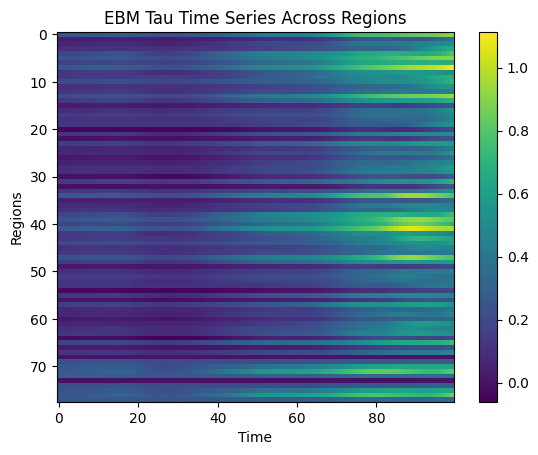

In [38]:
# Generate heatmap

if nsubtypes > 1:

    for subtype in range(1,nsubtypes + 1):

        plt.imshow(tau_array_dicts[subtype], cmap='viridis', interpolation='none')
        plt.colorbar()  # Add a color bar to map colors to values
        plt.title('Heatmap of Tau Time Series- Subtype ' + str(subtype))
        plt.show()

else:
    plt.imshow(tau_array_excluded, cmap='viridis', interpolation='none', aspect='auto')
    plt.colorbar()  # Add a color bar to map colors to values
    plt.title('EBM Tau Time Series Across Regions')
    plt.xlabel('Time')  # Replace with your actual label
    plt.ylabel('Regions')
    plt.show()

In [56]:
tau_data

,RID,ctx-rh-bankssts,ctx-rh-caudalanteriorcingulate,ctx-rh-caudalmiddlefrontal,ctx-rh-cuneus,ctx-rh-entorhinal,ctx-rh-fusiform,ctx-rh-inferiorparietal,ctx-rh-inferiortemporal,ctx-rh-isthmuscingulate,...,Left-VentralDC,Right-Cerebellum-Cortex,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC
0,69,0.338925,0.126098,0.109817,0.154415,0.248051,0.382141,0.200296,0.343167,0.172768,...,0.291959,-0.006512,0.313863,0.335964,0.745141,0.930340,0.246966,0.361717,0.361421,0.304687
1,112,0.477276,0.219338,0.370478,0.274001,0.395650,0.406077,0.277792,0.508347,0.328664,...,0.355100,0.005740,0.303491,0.148876,0.670546,0.707726,0.489810,0.687398,0.452525,0.305914
2,120,0.210025,0.116947,0.073059,0.143986,0.124539,0.165202,0.207322,0.222089,0.097811,...,0.158754,0.002236,0.195986,0.078987,0.394831,0.427279,0.209505,0.133274,0.138370,0.147314
3,127,0.310061,-0.077580,0.041180,0.121690,0.190684,0.281888,0.173204,0.306051,0.035628,...,0.310781,-0.011465,0.226261,0.099275,0.581615,0.851627,0.202715,0.216493,0.135263,0.206622
4,142,0.165934,0.034609,-0.026117,0.064034,0.130190,0.119822,0.043890,0.266946,0.130881,...,0.237917,-0.000543,0.147865,0.030758,0.549148,0.632881,0.049222,0.462750,0.506788,0.256974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,6702,0.202119,0.077832,0.024959,0.156785,0.039527,0.119703,0.156887,0.194580,0.079462,...,0.393643,0.011817,0.266707,0.205379,0.412490,0.554401,0.112775,0.054605,0.310717,0.383456
306,6704,0.233781,0.092975,0.076744,0.104641,0.098656,0.172407,0.144814,0.188435,0.080091,...,0.277606,0.007355,0.197261,0.148973,0.437991,0.583363,0.166624,0.161248,0.168146,0.283084
307,6705,0.144939,-0.043662,-0.034568,-0.023614,0.061644,0.119000,0.039735,0.101121,0.026714,...,0.162197,0.019790,0.186069,0.050483,0.495582,0.548597,0.138428,0.217796,0.168191,0.190823
308,6721,0.246493,0.109761,0.045940,0.121419,0.214681,0.228413,0.176250,0.255187,0.311401,...,0.357143,-0.013831,0.410591,0.209741,0.661035,0.912172,0.299546,0.309425,0.449516,0.384311


In [61]:
# Preparing data frame for Nexis on individual subjects

stage_data = zdata[['RID', 'Diagnosis', 'ml_stage']]

final = pandas.merge(stage_data, tau_data, on='RID', how='inner')

final.to_csv('Cross-sectional stage and regional tau - with tmax2.csv')